familiy T, slope 0.6604223400422983, intercept -3.969485953025464e-14, r2 0.4361576672269452


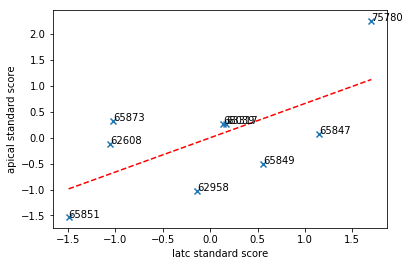

familiy Y123, slope 0.7568466385518402, intercept 1.058917725246855e-14, r2 0.5728168342872202


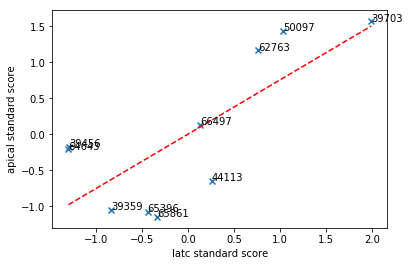

familiy RE123, slope -0.5448066337103848, intercept -7.42497891363462e-15, r2 0.2968142681348416


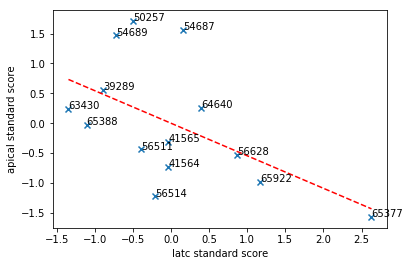

familiy Y124, slope 0.8141130560883939, intercept -1.3541814722131159e-13, r2 0.6627800680935843


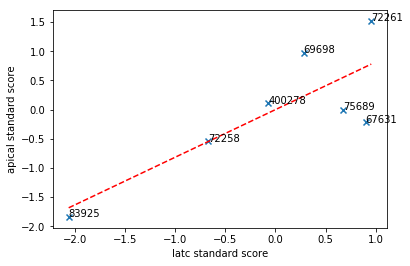

familiy RE124, slope -0.976681126345794, intercept 2.292426479166252e-14, r2 0.9539060225600892


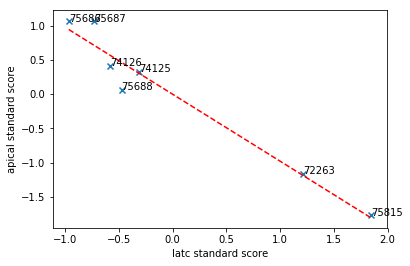

familiy Hg1201, slope 0.8385451349906806, intercept 2.1512050359033063e-15, r2 0.7031579434165384


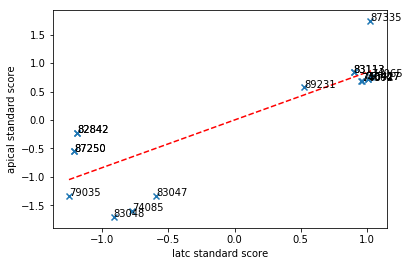

familiy Tl1201, slope 0.8777062599590332, intercept -1.0249070291650124e-14, r2 0.7703682787712743


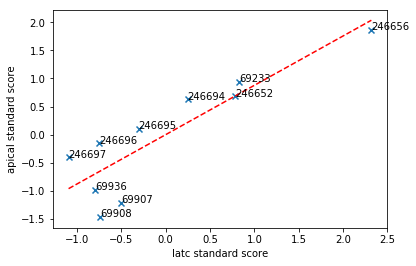

familiy Tl1212, slope 0.921431859093139, intercept -1.9351331500575255e-15, r2 0.8490366709518383


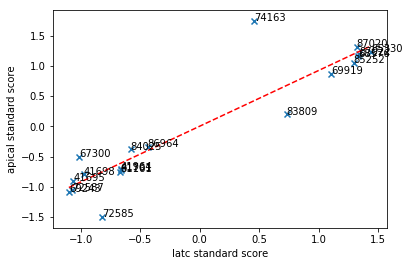

familiy Hg1212, slope 0.8352815398252066, intercept 7.297220300081128e-15, r2 0.6976952507727682


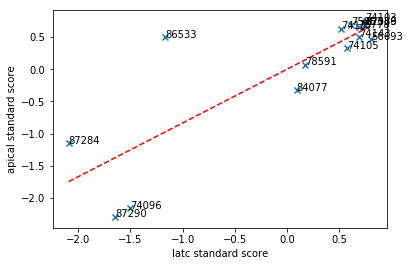

familiy Tl1223, slope 0.9653075300593714, intercept 1.7947770736115913e-14, r2 0.9318186275893244


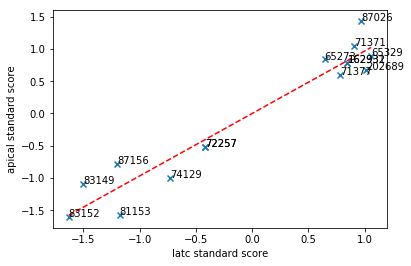

familiy Hg1223, slope 0.8643372303257959, intercept 5.699624531974952e-15, r2 0.7470788477272683


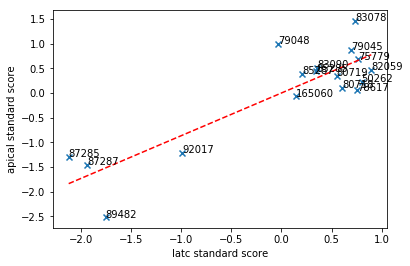

familiy Tl2201, slope 0.8427252631621336, intercept -2.879452566463461e-14, r2 0.7101858691716871


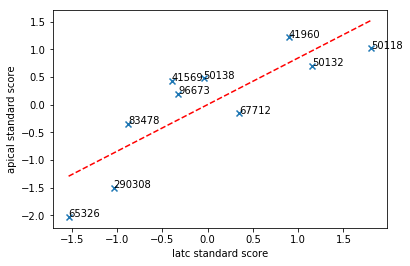

familiy Bi2201, slope 0.665971490730186, intercept -2.2774594826762467e-15, r2 0.44351802646538624


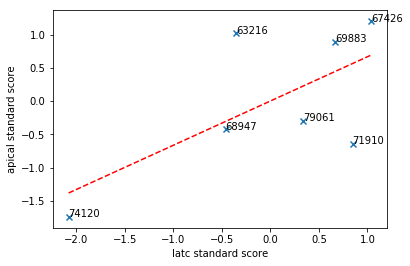

familiy Tl2212, slope 0.8653963165138189, intercept -1.0283605424779745e-14, r2 0.7489107846356862


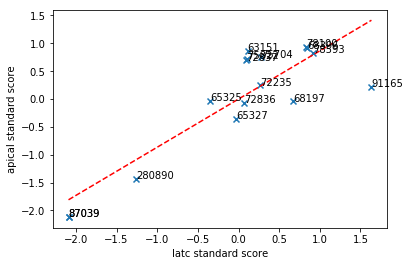

familiy Hg2212, slope 0.9837964831093566, intercept -1.9940322415011165e-15, r2 0.9678555201783386


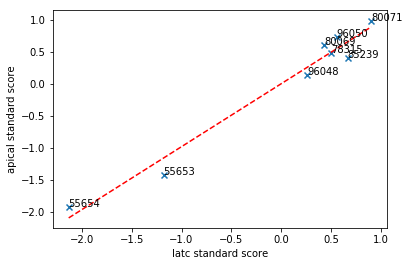

familiy Bi2212, slope 0.7756424853772499, intercept -3.819631196214894e-15, r2 0.6016212651221972


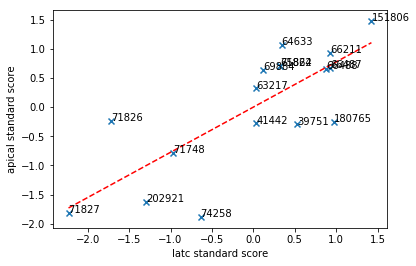

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



families = icsd["str3 :"].unique()

for fam in families:
    
    idx = (icsd["str3 :"] == fam)

    api = icsd.loc[idx,["cu-o_a :"]].values.ravel()
    c = icsd.loc[idx,["latc :"]].values.ravel()
    idx = icsd.loc[idx, ["id :"]].values.ravel()
    
    if len(api) < 5:
        print("{} not enough data".format(fam))
        continue
    
    api = stats.zscore(api)
    c = stats.zscore(c)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(c,api)
    
    sort = c.argsort().ravel()
    
    api = api[sort]
    c = c[sort]
    idx = idx[sort]
    
    lin = np.array((c[0],c[-1]))*slope + intercept
    
    print("familiy {}, slope {}, intercept {}, r2 {}".format(fam, slope, intercept, r_value**2))
    
    plt.scatter(c,api, marker='x')
#     print(idx)
    for i, txt in enumerate(idx):
        plt.annotate(txt, (c[i], api[i]))
    plt.plot((c[0],c[-1]),lin, 'r--')
    plt.xlabel('latc standard score')
    plt.ylabel('apical standard score')
    plt.show()

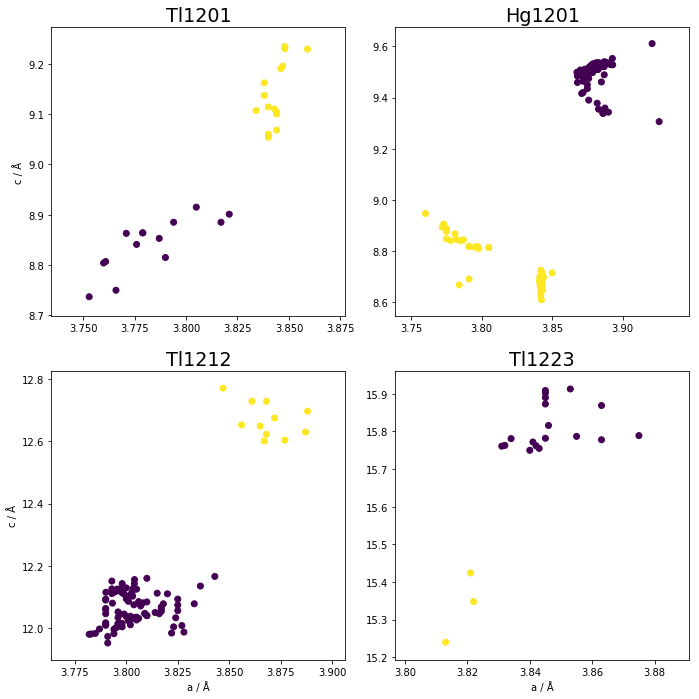

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

super_ = pd.read_csv("/home/rhys/PhD/lattice/data/processed/super_cleaned.csv")
icsd = pd.read_csv("/home/rhys/PhD/lattice/data/processed/icsd_cleaned.csv")

families = ["Tl1201", "Hg1201", "Tl1212", "Tl1223"]

fig, ax = plt.subplots(2,2, figsize=(10,10))
plt.rcParams.update({'font.size': 16})

for i, fam in enumerate(families):
    j, k = divmod(i,2)                   
    idx = (super_["str3 :"]==fam)
    X = super_.loc[idx, ["lata :", "latc :"]].values
    y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(X)
    
    ax[j,k].scatter(X[:, 0], X[:, 1], c=y_pred)
    ax[j,k].set_title(fam)
    
ax[0,0].set_ylabel("c / Å")
ax[1,0].set_ylabel("c / Å")
ax[1,0].set_xlabel("a / Å")
ax[1,1].set_xlabel("a / Å")


fig.tight_layout()
plt.savefig("k-means.pdf", bbox_inches='tight')
plt.show()

In [5]:
a = [1,2,3,4,5,6]
b = [2,3,4,5,6,7]

print(stats.linregress(a,b))

LinregressResult(slope=1.0, intercept=1.0, rvalue=1.0, pvalue=1.5000000000000099e-40, stderr=0.0)
